In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

from zipfile import ZipFile
from functools import reduce

#### Here we are focusing on agricultural pollution and industrial residue in the Baltic Sea

A significant problem in the Baltic sea is eutrophication which leads to cloudy water, reducing light conditions in the water and oxygen consumption. The excessive richness of nutrition in water is caused mainly by agricultural pollution and industrial residue. 

In [2]:
# !pip install -q gdown httpimport
# !gdown 'https://github.com/wenjie-hoo/baltic_ml/raw/main/2022.11.07-merged-single-observation.zip'

In [3]:
zip_file = ZipFile('./2022.11.07-merged-single-observation.zip')
dfs = {text_file.filename: pd.read_csv(zip_file.open(text_file.filename))
       for text_file in zip_file.infolist()
       if text_file.filename.endswith('.csv') and not text_file.filename[37:].startswith('.')}

df_list=[]
for df in dfs.values():
       df['DATE'] = pd.to_datetime(df['DATE'],dayfirst = True)
       df_list.append(df)

df = reduce(lambda left,right: pd.merge(left.drop_duplicates(subset=['DATE','DEPTH']),right.drop_duplicates(subset=['DATE','DEPTH']),on=['DATE','DEPTH'],how='outer'), df_list)
# df.to_csv('xxxxx.csv')

In [4]:
df = df.drop(['PH'],axis=1)
df.dropna(inplace=True) 
# df.head

/var/folders/zf/z_5ht60d3n7gfsmz14cjq6fc0000gn/T/ipykernel_98828/740988892.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),vmax=1, annot=True, linewidths=0.5, cbar=False, cmap='YlGnBu',annot_kws={'fontsize':10})


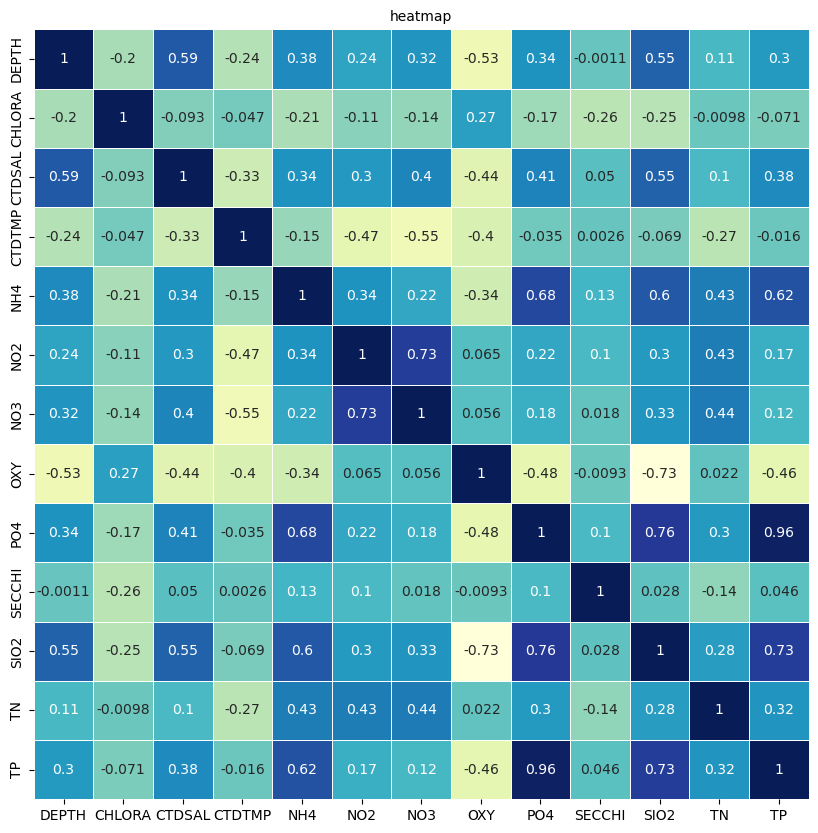

In [5]:

fig = plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),vmax=1, annot=True, linewidths=0.5, cbar=False, cmap='YlGnBu',annot_kws={'fontsize':10})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('heatmap',fontsize=10)
plt.show()

|  element  | shortened form  |
|  ----  | ----  |
|Dissolved oxygen |  OXY|
|Phosphate | PO4|
|Total phosphorus | TP|
|Nitrogen dioxide | NO2|
|Nitrate | NO3|
|Ammonia | NH4|
|Total nitrogen | TN|
|Silicon dioxide | SIO2|
|Chlorophyll | CHLORA|
|Secchi depth | SECCHI|
|Dissolved Inorganic Carbon (DIC) | PH|
|Salinity | CTDSAL|
|Centigrade Temperature | CTDTMP|

In [6]:
## Some helpful filters

def fix_date_formatting(df):
    df['DATE'] = pd.to_datetime(df.DATE, infer_datetime_format=True)
    return df

def filter_by_months(df, months):
    return df[df['DATE'].dt.month == any(months)]

def group_by_year(df, par):
    df =  df.groupby(df['DATE'].dt.year)[par].mean()
    return pd.DataFrame({"DATE":df.index, par:df.values})
    
def filter_by_depth(df, depth):
    df = df.loc[df['DEPTH'] == depth]
    return df

In [7]:
# print(df['DEPTH'].value_counts())
depth_list = (df['DEPTH'].value_counts()[df['DEPTH'].value_counts() > 100]).index.to_list()
depth_list.sort()
print(depth_list)

[100, 500, 1000, 1500, 2000, 2500]


In [9]:
# create df by depth
for i in depth_list:
    df_name = 'df_depth_' + str(i)
    vars()[df_name] = filter_by_depth(df,i)